In [70]:
import numpy as np
import pandas as pd
from scipy import integrate
from scipy import linalg

### Pandas

Для некоторых заданий, возможно, придется обратиться к документации: https://pandas.pydata.org/docs/

* Скачайте любой табличный датасет (или создайте тестовый пример самостоятельно), например, с https://www.kaggle.com/datasets

*  Загрузите данные и проанализируйте их (используя функции .info и .describe)
*  Выведите отдельно интересующую вас колонку и столбец

In [107]:
df = pd.read_csv('new-used-cars-dataset.csv')
df.head()

,Car Names,Mileages,Ratings,Reviews,used/certified,price drop,Price
0,2019 Honda Accord Sport,Mileage,3.7,(3 reviews),Used,$501 price drop,"$27,995"
1,2015 Chevrolet Corvette Stingray Z51,"29,192 mi.",3.7,(3 reviews),Used,$277 price drop,"$52,000"
2,2020 Jeep Grand Cherokee Overland,"53,561 mi.",4.8,"(1,147 reviews)",Used,"$2,000 price drop","$41,998"
3,2019 Audi A7 3.0T Prestige,"46,664 mi.",4.9,"(1,831 reviews)",Used,"$2,090 price drop","$62,750"
4,2017 Ford Mustang GT Premium,"21,726 mi.",4.0,(409 reviews),Used,$200 price drop,"$29,995"


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9330 entries, 0 to 9329
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Car Names       9330 non-null   object 
 1   Mileages        9330 non-null   object 
 2   Ratings         9330 non-null   float64
 3   Reviews         9330 non-null   object 
 4   used/certified  9330 non-null   object 
 5   price drop      9330 non-null   object 
 6   Price           9330 non-null   object 
dtypes: float64(1), object(6)
memory usage: 510.4+ KB


In [109]:
df.describe()

,Ratings
count,9330.000000
mean,4.488682
std,0.485635
min,1.400000
25%,4.400000
50%,4.600000
75%,4.800000
max,5.000000


In [124]:
df.loc[:,'Car Names']

0                    2019 Honda Accord Sport
1       2015 Chevrolet Corvette Stingray Z51
2          2020 Jeep Grand Cherokee Overland
3                 2019 Audi A7 3.0T Prestige
4               2017 Ford Mustang GT Premium
                        ...                 
9325                  2019 Lexus IS 300 Base
9326                      2019 Kia Sorento L
9327                  2017 GMC Acadia Denali
9328                  2019 Honda Pilot Elite
9329                    2019 GMC Terrain SLT
Name: Car Names, Length: 9330, dtype: object

In [122]:
df.loc[9000, :]

Car Names         2008 Ford Escape XLT
Mileages                    22,048 mi.
Ratings                            4.7
Reviews                   (30 reviews)
used/certified                    Used
price drop             $500 price drop
Price                           $4,995
Name: 9000, dtype: object

In [121]:
df.loc?

### Numpy

Для некоторых заданий, возможно, придется обратиться к документации: https://numpy.org

* Создайте вектор (одномерный массив) размера 10, заполненный нулями
* Создайте вектор размера 10, заполненный числом 5.8
* Создйте массив 3x3x3 со случайными значениями
* Создайте 8x8 матрицу и заполнить её в шахматном порядке
* Cоздайте матрицу 4 на 4 и заполните ее произвольными числами (понадобиться в дальйнешем)

In [24]:
#Создайте вектор (одномерный массив) размера 10, заполненный нулями
size=10
v_zeros = np.zeros(size)
v_zeros

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [25]:
# Создайте вектор размера 10, заполненный числом 5.8
size=10
v2 = np.full(size, 5.8)
v2

array([5.8, 5.8, 5.8, 5.8, 5.8, 5.8, 5.8, 5.8, 5.8, 5.8])

In [44]:
# Создйте массив 3x3x3 со случайными значениями
v_rnd = np.random.rand(3, 3, 3)
v_rnd


array([[[0.50883728, 0.98402805, 0.95802734],
        [0.38714158, 0.97914597, 0.00769329],
        [0.70878202, 0.79375067, 0.76090666]],

       [[0.33664604, 0.66036019, 0.41497085],
        [0.05532802, 0.53984728, 0.37318853],
        [0.50776435, 0.99050967, 0.29367124]],

       [[0.31575221, 0.64646587, 0.65717244],
        [0.59216792, 0.03366663, 0.08365487],
        [0.30989036, 0.08994253, 0.11947334]]])

In [64]:
# Создайте 8x8 матрицу и заполнить её в шахматном порядке
m_chess = np.fromfunction(lambda i, j: (i+j)%2, (8, 8), dtype=int)
m_chess

array([[0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0]], dtype=int32)

In [65]:
# Cоздайте матрицу 4 на 4 и заполните ее произвольными числами (понадобиться в дальйнешем)
v_rnd = np.random.rand(4,4)
v_rnd

array([[0.24571493, 0.3243375 , 0.16363656, 0.49144333],
       [0.40714965, 0.87580037, 0.76668194, 0.02797951],
       [0.18975023, 0.39710013, 0.48795591, 0.27056906],
       [0.50235705, 0.70040206, 0.93027827, 0.99792151]])

### Scipy


* Возьмите интеграл $\int_{-3}^{10} sin(x)* x^{2} \,dx $
* Найдите определитель, обратную матрицу и собственные значения к матрице из последнего пункта раздела Numpy


In [69]:
f1 = lambda x: np.sin(x)*x**2
integrate.quad(f1, -3, 10)

(63.57192010714263, 2.1778037844715755e-12)

In [71]:
linalg.det(v_rnd)

-0.009454176687058455

In [72]:
linalg.inv(v_rnd)

array([[ -5.10561431,   5.92849784, -25.00440201,   9.12763296],
       [  5.59441475,  -1.62265494,  12.08712027,  -5.98678101],
       [ -3.75762371,   0.07962944,  -0.70239603,   2.03871521],
       [  2.1465991 ,  -1.9197796 ,   4.75860817,  -1.29143371]])

In [73]:
linalg.eig(v_rnd)

(array([ 1.90590422+0.j,  0.61355278+0.j, -0.0561221 +0.j,  0.14405781+0.j]),
 array([[-0.34235951, -0.35602389, -0.80308213,  0.89500818],
        [-0.38509611,  0.63571973,  0.51302827, -0.03150126],
        [-0.30638917, -0.00338815, -0.20525784, -0.4446375 ],
        [-0.8003853 , -0.68490578,  0.22300293, -0.01629478]]))

### Matplotlib/Seaborn


* Нарисуйте график sin(x), подпишите оси, добавьте сетку
* Нарисуйте график sin(x) и cos(x) на одном subplot'е и на разных, задайте цвета, которые вам больше нравятся

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

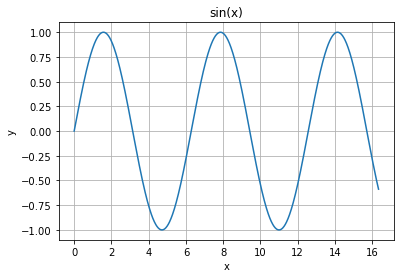

In [81]:
lag = 1
x = np.linspace(0.0, 5.2 * np.pi, 1000)
y = np.sin(x)

fig = plt.figure()
plt.plot(x, y)
plt.grid()

plt.title('sin(x)')
plt.ylabel('y')
plt.xlabel('x');

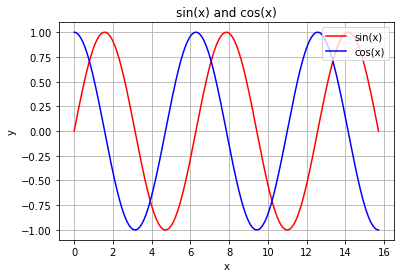

In [92]:
x = np.linspace(0.0, 5 * np.pi, 1000)
y1 = np.sin(x)
y2 = np.cos(x)

fig = plt.figure()
plt.plot(x, y1, label='sin(x)', color='r')
plt.plot(x, y2, label='cos(x)', color='b')
plt.grid()
plt.legend(loc='upper right')

plt.title('sin(x) and cos(x)')
plt.ylabel('y')
plt.xlabel('x');

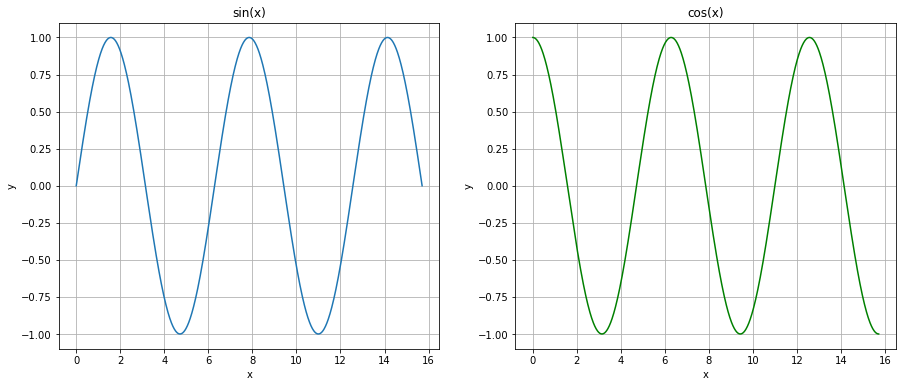

In [105]:
x = np.linspace(0.0, 5 * np.pi, 1000)
y1 = np.sin(x)
y2 = np.cos(x)

fig = plt.figure(figsize=(15,6))

plt.subplot(1, 2, 1)
plt.plot(x, y1, label='sin(x)')
plt.grid()
plt.title('sin(x)')
plt.ylabel('y')
plt.xlabel('x');


plt.subplot(1, 2, 2)
plt.plot(x, y2, label='cos(x)', color='g')
plt.grid()
plt.title('cos(x)')
plt.ylabel('y')
plt.xlabel('x');


In [106]:
# plt.subplot?